In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [2]:
# Starting dataset
df = pd.read_csv('customer_dataframe.csv', sep='\t', index_col=0)
df2 = df[['MaxPO','TSale','MinPO','MeanProdOrder','MeanPSale']]#,'SETSaleQta']]
df2.head()

,MaxPO,TSale,MinPO,MeanProdOrder,MeanPSale
CustomerID,,,,,
17850,141,5317.89,12,48.629,3.960
13047,309,3089.10,3,84.688,3.926
12583,714,6629.34,100,292.824,2.140
13748,208,948.25,8,87.800,3.996
15100,32,635.10,16,9.667,10.950


In [3]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4333 entries, 17850 to 12713
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MaxPO          4333 non-null   int64  
 1   TSale          4333 non-null   float64
 2   MinPO          4333 non-null   int64  
 3   MeanProdOrder  4333 non-null   float64
 4   MeanPSale      4333 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 203.1 KB


# Normalization

In [4]:
scaler = MinMaxScaler()
df_norm = scaler.fit_transform(df2.to_numpy())

# K-MEANS

In [5]:
sse_list = list()
sil_list = list()
max_k = 15
for k in tqdm(range(2, max_k + 1), total=max_k - 1, desc="Iterating over possible K values"):
    kmeans_iter = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans_iter.fit(df_norm)
    
    sil_list.append(silhouette_score(df_norm, kmeans_iter.labels_))
    sse = kmeans_iter.inertia_
    sse_list.append(sse)

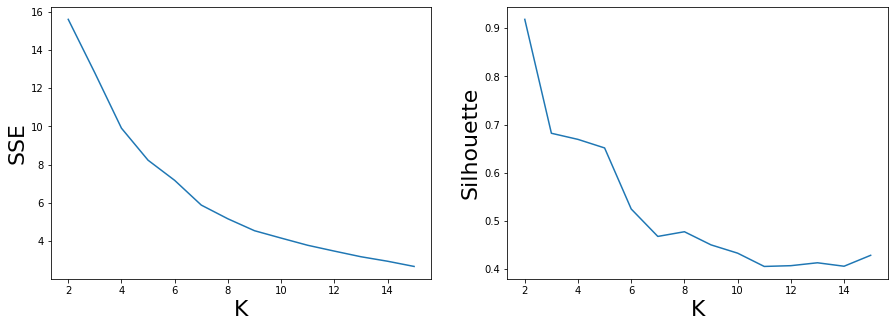

In [6]:
fig, axs = plt.subplots(1,2,figsize=(15,5))
axs[0].plot(range(2, len(sse_list) + 2), sse_list)
axs[0].set_ylabel('SSE', fontsize=22)
axs[0].set_xlabel('K', fontsize=22)
axs[0].tick_params(axis='both', which='major', labelsize=10)

axs[1].plot(range(2, len(sil_list) + 2), sil_list)
axs[1].set_ylabel('Silhouette', fontsize=22)
axs[1].set_xlabel('K', fontsize=22)
axs[1].tick_params(axis='both', which='major', labelsize=10)

In [7]:
kmeans = KMeans(n_clusters=5, n_init=100)
kmeans.fit(df_norm)

KMeans(n_clusters=5, n_init=100)

In [8]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3, 4]), array([ 461, 3831,   26,   11,    4], dtype=int64))

In [9]:
print("SSE:",sse_list[4]," - SILHOUETTE:",sil_list[4])

SSE: 7.1726527478209015  - SILHOUETTE: 0.5247999902684078


In [10]:
hist, bins = np.histogram(kmeans.labels_, 
                          bins=range(0, len(set(kmeans.labels_)) + 1))
dict(zip(bins, hist))

{0: 461, 1: 3831, 2: 26, 3: 11, 4: 4}

Text(0.5, 0, 'TSale')

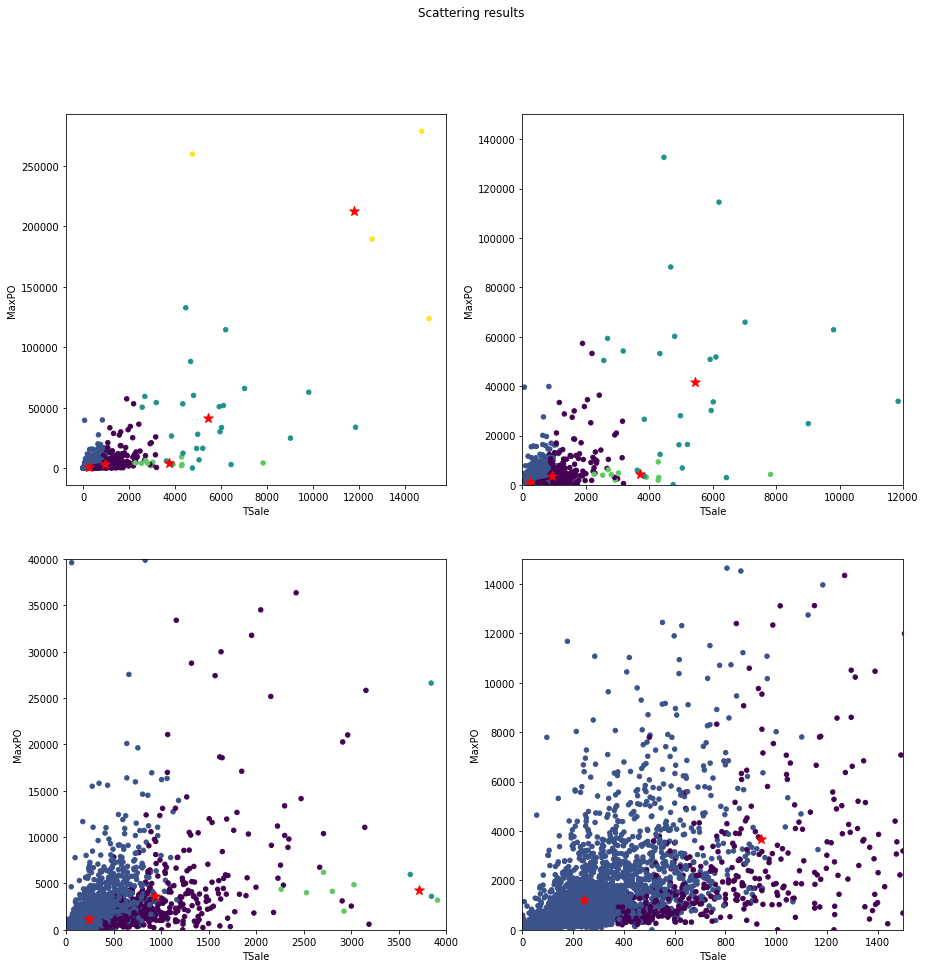

In [11]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

fig, axs = plt.subplots(2,2,figsize=(15,15))
fig.suptitle('Scattering results')

label_s = 10

col1, i1 = df2['MaxPO'], 0
col2, i2 = df2['TSale'], 1

axs[0][0].scatter(col1, col2, c=kmeans.labels_, 
            s=20)
axs[0][0].scatter(centers[:, i1], centers[:, i2], s=100, marker='*', c='r')
axs[0][0].tick_params(axis='both', which='major', labelsize=label_s)
axs[0][0].set_ylabel(df2.columns[i1], fontsize=label_s)
axs[0][0].set_xlabel(df2.columns[i2], fontsize=label_s)

axs[0][1].set_xlim((0,12000))
axs[0][1].set_ylim((0,150000))
axs[0][1].scatter(col1, col2, c=kmeans.labels_, 
            s=20)
axs[0][1].scatter(centers[:, i1], centers[:, i2], s=100, marker='*', c='r')
axs[0][1].tick_params(axis='both', which='major', labelsize=label_s)
axs[0][1].set_ylabel(df2.columns[i1], fontsize=label_s)
axs[0][1].set_xlabel(df2.columns[i2], fontsize=label_s)

axs[1][0].set_xlim((0,4000))
axs[1][0].set_ylim((0,40000))
axs[1][0].scatter(col1, col2, c=kmeans.labels_, 
            s=20)
axs[1][0].scatter(centers[:, i1], centers[:, i2], s=100, marker='*', c='r')
axs[1][0].tick_params(axis='both', which='major', labelsize=label_s)
axs[1][0].set_ylabel(df2.columns[i1], fontsize=label_s)
axs[1][0].set_xlabel(df2.columns[i2], fontsize=label_s)

axs[1][1].set_xlim((0,1500))
axs[1][1].set_ylim((0,15000))
axs[1][1].scatter(col1, col2, c=kmeans.labels_, 
            s=20)
axs[1][1].scatter(centers[:, i1], centers[:, i2], s=100, marker='*', c='r')
axs[1][1].tick_params(axis='both', which='major', labelsize=label_s)
axs[1][1].set_ylabel(df2.columns[i1], fontsize=label_s)
axs[1][1].set_xlabel(df2.columns[i2], fontsize=label_s)

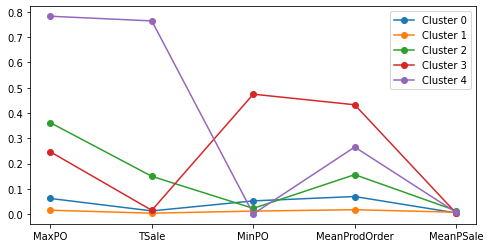

In [12]:
# normalized centers
plt.figure(figsize=(8, 4))
for i in range(0, len(kmeans.cluster_centers_)):
    plt.plot(kmeans.cluster_centers_[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=label_s)
plt.xticks(range(0, len(df2.columns)), df2.columns, fontsize=label_s)
plt.legend(fontsize=label_s)
plt.show()

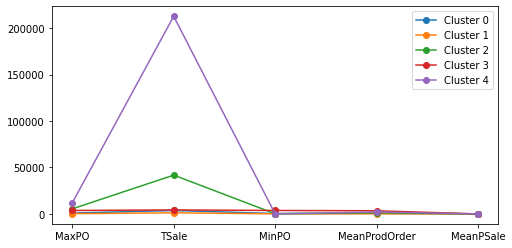

In [13]:
# non normalized centers
plt.figure(figsize=(8, 4))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=label_s)
plt.xticks(range(0, len(df2.columns)), df2.columns, fontsize=label_s)
plt.legend(fontsize=label_s)
plt.show()

# ANALYZING RESULTS

In [14]:
df['Cluster'] = kmeans.labels_

clust_list = list()
for i in tqdm(range(len(df['Cluster'].unique())), total=len(df['Cluster'].unique()), desc="Creating cluster dataframes"):
    clust_list.append(df[df['Cluster'] == i])

In [27]:
mean_list = list()
std_list = list()
min_list = list()
max_list = list()

attr = 'TOrder'

for i in clust_list:
    mean_list.append(i.describe()[attr][1])
    std_list.append(i.describe()[attr][2])
    min_list.append(i.describe()[attr][3])
    max_list.append(i.describe()[attr][7])

Text(0.5, 1.0, 'Max')

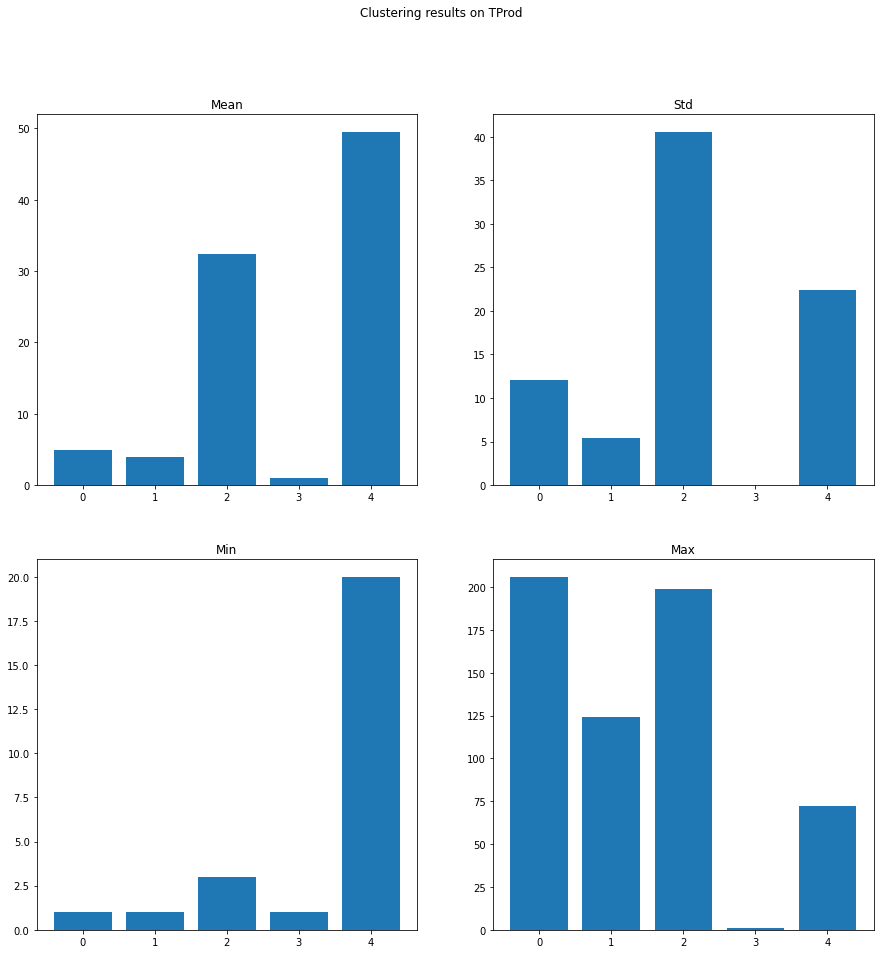

In [28]:
fig, axs = plt.subplots(2,2,figsize=(15,15))
fig.suptitle('Clustering results on TProd')

label_s = 10


axs[0][0].bar(range(len(mean_list)), mean_list)
axs[0][0].tick_params(axis='both', which='major', labelsize=label_s)
axs[0][0].set_title('Mean')

axs[0][1].bar(range(len(std_list)), std_list)
axs[0][1].tick_params(axis='both', which='major', labelsize=label_s)
axs[0][1].set_title('Std')

axs[1][0].bar(range(len(min_list)), min_list)
axs[1][0].tick_params(axis='both', which='major', labelsize=label_s)
axs[1][0].set_title('Min')

axs[1][1].bar(range(len(max_list)), max_list)
axs[1][1].tick_params(axis='both', which='major', labelsize=label_s)
axs[1][1].set_title('Max')


In [17]:
hist, bins = np.histogram(kmeans.labels_, 
                          bins=range(0, len(set(kmeans.labels_)) + 1))
dict(zip(bins, hist))

{0: 461, 1: 3831, 2: 26, 3: 11, 4: 4}

In [19]:
clust_list[0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 461 entries, 16210 to 12713
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TProd           461 non-null    int64  
 1   DProd           461 non-null    int64  
 2   MaxPO           461 non-null    int64  
 3   MinPO           461 non-null    int64  
 4   MeanProdOrder   461 non-null    float64
 5   TSale           461 non-null    float64
 6   MinPSale        461 non-null    float64
 7   MaxPSale        461 non-null    float64
 8   MeanSaleOrder   461 non-null    float64
 9   TRProd          461 non-null    int64  
 10  MeanPSale       461 non-null    float64
 11  TOrder          461 non-null    int64  
 12  SETSaleQta      461 non-null    float64
 13  SESaleQtaOrder  461 non-null    float64
 14  Cluster         461 non-null    int32  
dtypes: float64(8), int32(1), int64(6)
memory usage: 55.8 KB
